In [2]:
import pandas as pd
import glob
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve , auc



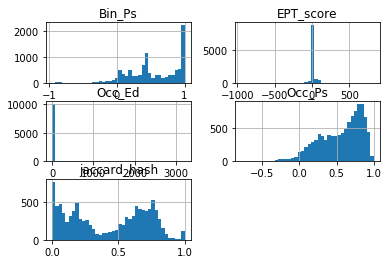

EPT_score
0.6104328474317524
Occ_Ed
0.5829020098157776
Occ_Ps
0.6028537217467367
Bin_Ps
0.5840538157214453
jaccard_hash
0.6634667354737015


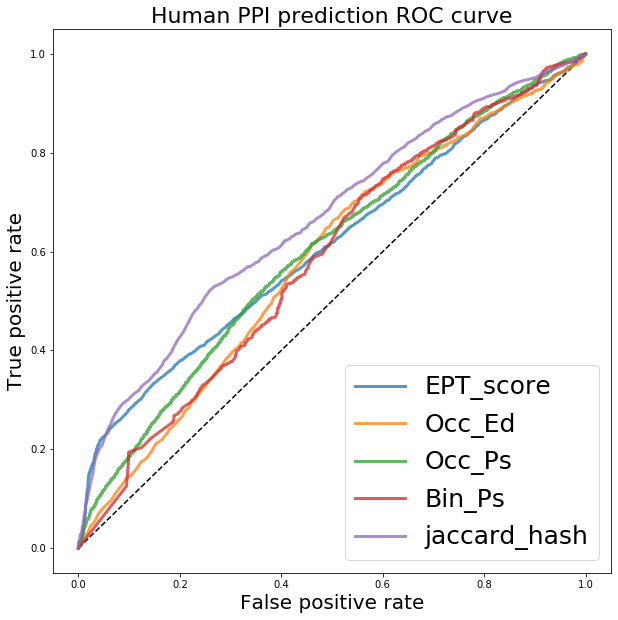

EPT_score
Occ_Ed
Occ_Ps
Bin_Ps
jaccard_hash


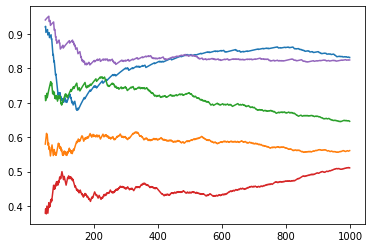

In [8]:
hists = 'EPT_score Occ_Ed Occ_Ps Bin_Ps jaccard_hash'.split()# jaccard_hash_opt'.split()
#totaldf = pd.read_csv('../validation_set/TaSuppData/humanwopt.csv')
totaldf = pd.read_csv('../validation_set/TaSuppData/yeastw_opt.csv')
totaldf[hists].hist( bins = 40 )
totaldf['Occ_Ed'] = - totaldf['Occ_Ed'] 
plt.show()
plt.figure( figsize =(10,10))
plt.plot([0, 1], [0, 1], 'k--')
for score in hists:
    sub = totaldf[[score,'truth']]   
    sub = sub.sort_values(score, axis = 0 , ascending=True)
    #sub = sub.iloc[0:1000]
    #sub1 = sub.iloc[0:500]
    #sub2 = sub.iloc[-500:]
    #sub = pd.concat([sub1,sub2])
    y_test = sub.truth
    y_pred = (sub[score]  - sub[score].min()) / (sub[score].max() - sub[score].min()) 
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    print(score)
    print(roc_auc)
    
    
    plt.plot(fpr, tpr, label=score , linewidth = 3 , alpha = .75)
    plt.xlabel('False positive rate' , fontsize = 20)
    plt.ylabel('True positive rate', fontsize = 20)
plt.legend(loc='best' , prop={'size': 25} )
plt.title('Human PPI prediction ROC curve', fontsize = 22)

plt.show()

for score in hists:
    print(score)
    sub = totaldf[[score,'truth']]   
    sub = sub.sort_values(score, axis = 0 , ascending=False)
    sub = sub.iloc[0:1000]
    sub['mean'+score] = sub.truth.expanding(min_periods=50).mean()
    plt.plot(range(len(sub)), sub['mean'+score], label=score)
plt.show()



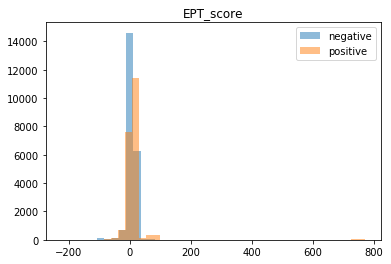

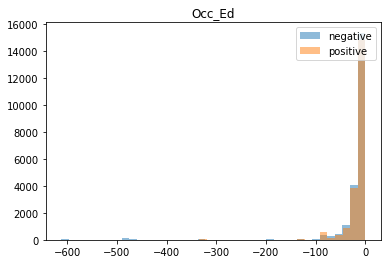

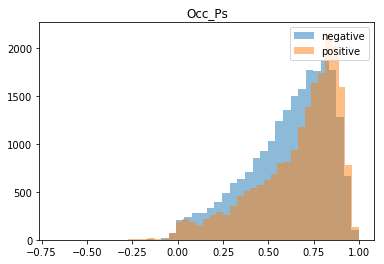

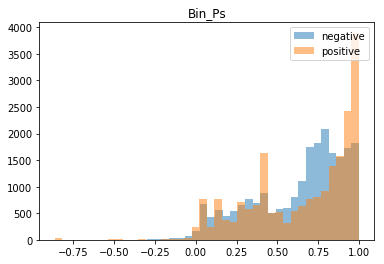

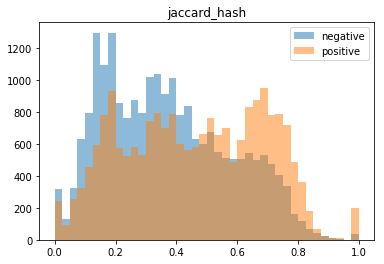

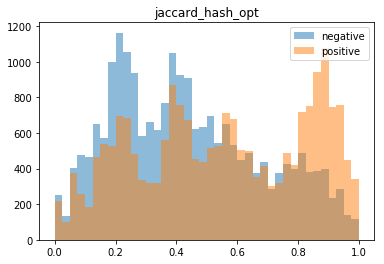

In [17]:



for score in hists:
    plt.clf()
    sub = totaldf[[score,'truth']]   
    sub = sub.sort_values(score, axis = 0 , ascending=True)
    #sub = sub.iloc[0:1000]
    #sub1 = sub.iloc[0:500]
    #sub2 = sub.iloc[-500:]
    #sub = pd.concat([sub1,sub2])
    plt.hist(sub[score][sub.truth==0], bins=40, alpha=0.5, label='negative')
    plt.hist(sub[score][sub.truth==1], bins=40, alpha=0.5, label='positive')
    plt.legend(loc='upper right')
    plt.title(score)
    plt.show()